In [1]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random

In [2]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")

microplastics_csv.head()
#test
#test2

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,35217,4/6/2005 12:00:00 AM,2.19,-135.73,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6d278226-565e-4ed0-b46a-e1cabb32ecc0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.510939e+07,2.438491e+05
1,36142,2/24/2002 12:00:00 AM,-12.69,-142.30,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6fb35a58-21b6-4cce-9dbb-f9c222bc311d,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.584076e+07,-1.424337e+06
2,35881,10/25/2010 12:00:00 AM,19.62,-146.50,Pacific Ocean,NaN,NaN,0.00216,pieces/m3,0.0005-0.005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,67f360ab-017e-4a86-931b-6f7336c2c206,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.630831e+07,2.228069e+06
3,36474,11/16/2003 12:00:00 AM,18.97,-143.47,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,5be50d3b-7343-45f0-ac71-19a3cdc047ea,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.597101e+07,2.151404e+06
4,34553,3/5/2001 12:00:00 AM,19.38,-74.09,Atlantic Ocean,Caribbean Sea,NaN,0.00000,pieces/m3,0-0.0005,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,5e54fac6-640b-4445-8fff-94a9498d6168,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-8.247661e+06,2.199726e+06


In [6]:
#taking columns we need
clean_microplastics_df = microplastics_csv[["Date","Latitude","Longitude","Oceans","Measurement","Unit",]]
clean_microplastics_df["Year"] = pd.Series()
clean_microplastics_df.head()

C:\Users\Amber\AppData\Local\Temp\ipykernel_17740\3680080262.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  clean_microplastics_df["Year"] = pd.Series()
C:\Users\Amber\AppData\Local\Temp\ipykernel_17740\3680080262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_microplastics_df["Year"] = pd.Series()


,Date,Latitude,Longitude,Oceans,Measurement,Unit,Year
0,4/6/2005 12:00:00 AM,2.19,-135.73,Pacific Ocean,0.00000,pieces/m3,NaN
1,2/24/2002 12:00:00 AM,-12.69,-142.30,Pacific Ocean,0.00000,pieces/m3,NaN
2,10/25/2010 12:00:00 AM,19.62,-146.50,Pacific Ocean,0.00216,pieces/m3,NaN
3,11/16/2003 12:00:00 AM,18.97,-143.47,Pacific Ocean,0.00000,pieces/m3,NaN
4,3/5/2001 12:00:00 AM,19.38,-74.09,Atlantic Ocean,0.00000,pieces/m3,NaN


In [15]:
#cleaning time column
for i in range(len(clean_microplastics_df["Date"])):
    date_time = clean_microplastics_df.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics_df.loc[i,"Date"]=date
clean_microplastics_df.head()

,Date,Latitude,Longitude,Oceans,Measurement,Unit,Year
0,4/6/2005,2.19,-135.73,Pacific Ocean,0.00000,pieces/m3,2014
1,2/24/2002,-12.69,-142.30,Pacific Ocean,0.00000,pieces/m3,2014
2,10/25/2010,19.62,-146.50,Pacific Ocean,0.00216,pieces/m3,2014
3,11/16/2003,18.97,-143.47,Pacific Ocean,0.00000,pieces/m3,2014
4,3/5/2001,19.38,-74.09,Atlantic Ocean,0.00000,pieces/m3,2014


In [16]:
for x in range(len(clean_microplastics_df["Year"])):
    year_time = clean_microplastics_df.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics_df.loc[x,"Year"]=year
clean_microplastics_df.tail()
    

,Date,Latitude,Longitude,Oceans,Measurement,Unit,Year
11301,11/28/2014,15.5034,-52.4550,Atlantic Ocean,0.00200,pieces/m3,2014
11302,12/11/2014,15.3929,-57.7041,Atlantic Ocean,0.02500,pieces/m3,2014
11303,11/7/1995,17.3500,-60.2000,Atlantic Ocean,0.00864,pieces/m3,1995
11304,10/31/2001,18.6300,-59.6400,Atlantic Ocean,0.01080,pieces/m3,2001
11305,5/21/2014,18.0327,-63.0973,Atlantic Ocean,0.00200,pieces/m3,2014


In [5]:
# #changing date format
# clean_microplastics_df["Date"] = pd.to_datetime(clean_microplastics_df["Date"])
# clean_microplastics_df["Date"] = clean_microplastics_df["Date"].apply(lambda x: datetime.strftime(x,'%d/%m/%Y'))
# clean_microplastics_df

C:\Users\Amber\AppData\Local\Temp\ipykernel_17740\4089890703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_microplastics_df["Date"] = pd.to_datetime(clean_microplastics_df["Date"])
C:\Users\Amber\AppData\Local\Temp\ipykernel_17740\4089890703.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_microplastics_df["Date"] = clean_microplastics_df["Date"].apply(lambda x: datetime.strftime(x,'%d/%m/%Y'))


,Date,Latitude,Longitude,Oceans,Measurement,Unit
0,06/04/2005,2.1900,-135.7300,Pacific Ocean,0.00000,pieces/m3
1,24/02/2002,-12.6900,-142.3000,Pacific Ocean,0.00000,pieces/m3
2,25/10/2010,19.6200,-146.5000,Pacific Ocean,0.00216,pieces/m3
3,16/11/2003,18.9700,-143.4700,Pacific Ocean,0.00000,pieces/m3
4,05/03/2001,19.3800,-74.0900,Atlantic Ocean,0.00000,pieces/m3
...,...,...,...,...,...,...
11301,28/11/2014,15.5034,-52.4550,Atlantic Ocean,0.00200,pieces/m3
11302,11/12/2014,15.3929,-57.7041,Atlantic Ocean,0.02500,pieces/m3
11303,07/11/1995,17.3500,-60.2000,Atlantic Ocean,0.00864,pieces/m3
11304,31/10/2001,18.6300,-59.6400,Atlantic Ocean,0.01080,pieces/m3


In [25]:
#display results for microplastics over time

sample_df = clean_microplastics_df.sample(n=1000)
sample_df.head()

x_values = sample_df["Year"]
y_values = sample_df["Measurement"]
plt.ylim(0,1)
plt.bar(x_values,y_values)
plt.show()


TypeError: 'tuple' object is not callable

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

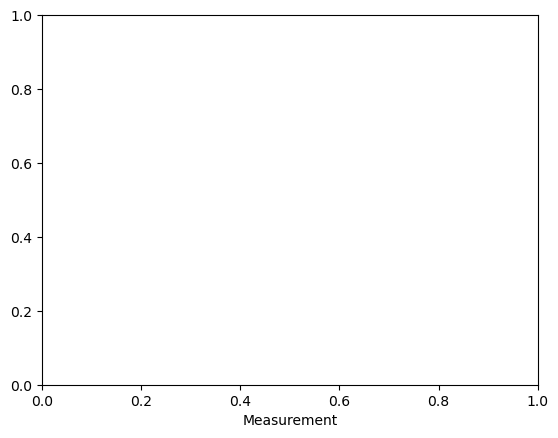

In [53]:
# sample_df.boxplot(column="Measurement",by="Date")
# plt.show()

In [ ]:
#display results for cancer rates over time 

In [ ]:
#display regression plots 